In [30]:
#importing libraries
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#environment check
import warnings
warnings.filterwarnings('ignore')

In [31]:
df= pd.read_csv('India_Menu.csv')

In [32]:
df.head()

Menu Category              Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu        McVeggie™ Burger          168 g         402.05   
1  Regular Menu    McAloo Tikki Burger®          146 g         339.52   
2  Regular Menu  McSpicy™ Paneer Burger          199 g         652.76   
3  Regular Menu       Spicy Paneer Wrap          250 g         674.68   
4  Regular Menu     American Veg Burger          177 g         512.17   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   
2        20.29          39.45        17.12           0.18              21.85   
3        20.96          39.10        19.73           0.26              40.93   
4        15.30          23.45        10.51           0.17              25.24   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0                   56.54              7.90              4.49       706.13  
1                   50.27              7.05              4.07       545.34  
2                   52.33              8.35              5.27      1074.58  
3                   59.27              3.50              1.08      1087.46  
4                   56.96              7.85              4.76      1051.24

In [33]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [34]:
df=df.fillna(0)

In [35]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe()

Energy (kCal)  Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  \
count     141.000000   141.000000     141.000000   141.000000     141.000000   
mean      244.635461     7.493546       9.991702     4.997589       0.687163   
std       185.554837     8.336863      10.339511     4.900451       6.326136   
min         0.000000     0.000000       0.000000     0.000000       0.000000   
25%       116.360000     0.650000       0.460000     0.280000       0.060000   
50%       219.360000     4.790000       7.770000     4.270000       0.150000   
75%       339.520000    10.880000      14.160000     7.280000       0.220000   
max       834.360000    39.470000      45.180000    20.460000      75.260000   

       Cholesterols (mg)  Total carbohydrate (g)  Total Sugars (g)  \
count         141.000000              141.000000        141.000000   
mean           26.350071               31.190284         15.464894   
std            50.334200               20.602044         15.690202   
min             0.000000                0.000000          0.000000   
25%             1.510000               15.740000          2.330000   
50%             8.390000               30.820000          9.160000   
75%            31.110000               46.000000         26.950000   
max           302.610000               93.840000         64.220000   

       Added Sugars (g)  Sodium (mg)  
count        141.000000   141.000000  
mean          10.336950   359.496312  
std           14.283388   472.452558  
min            0.000000     0.000000  
25%            0.000000    41.990000  
50%            3.640000   150.900000  
75%           19.230000   530.540000  
max           64.220000  2399.490000

In [38]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

<Axes: >

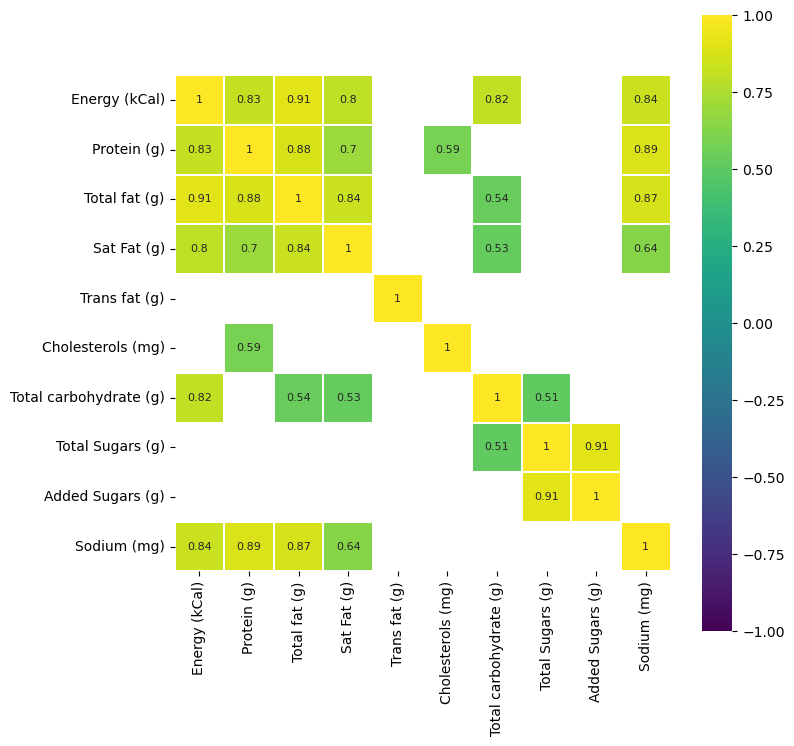

In [39]:
#correlation
corr = df.drop(['Menu Category', 'Menu Items'], axis=1).corr() 
plt.figure(figsize=(8, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, 
            linewidths=0.1,annot=True, 
            annot_kws={"size": 8}, square=True)

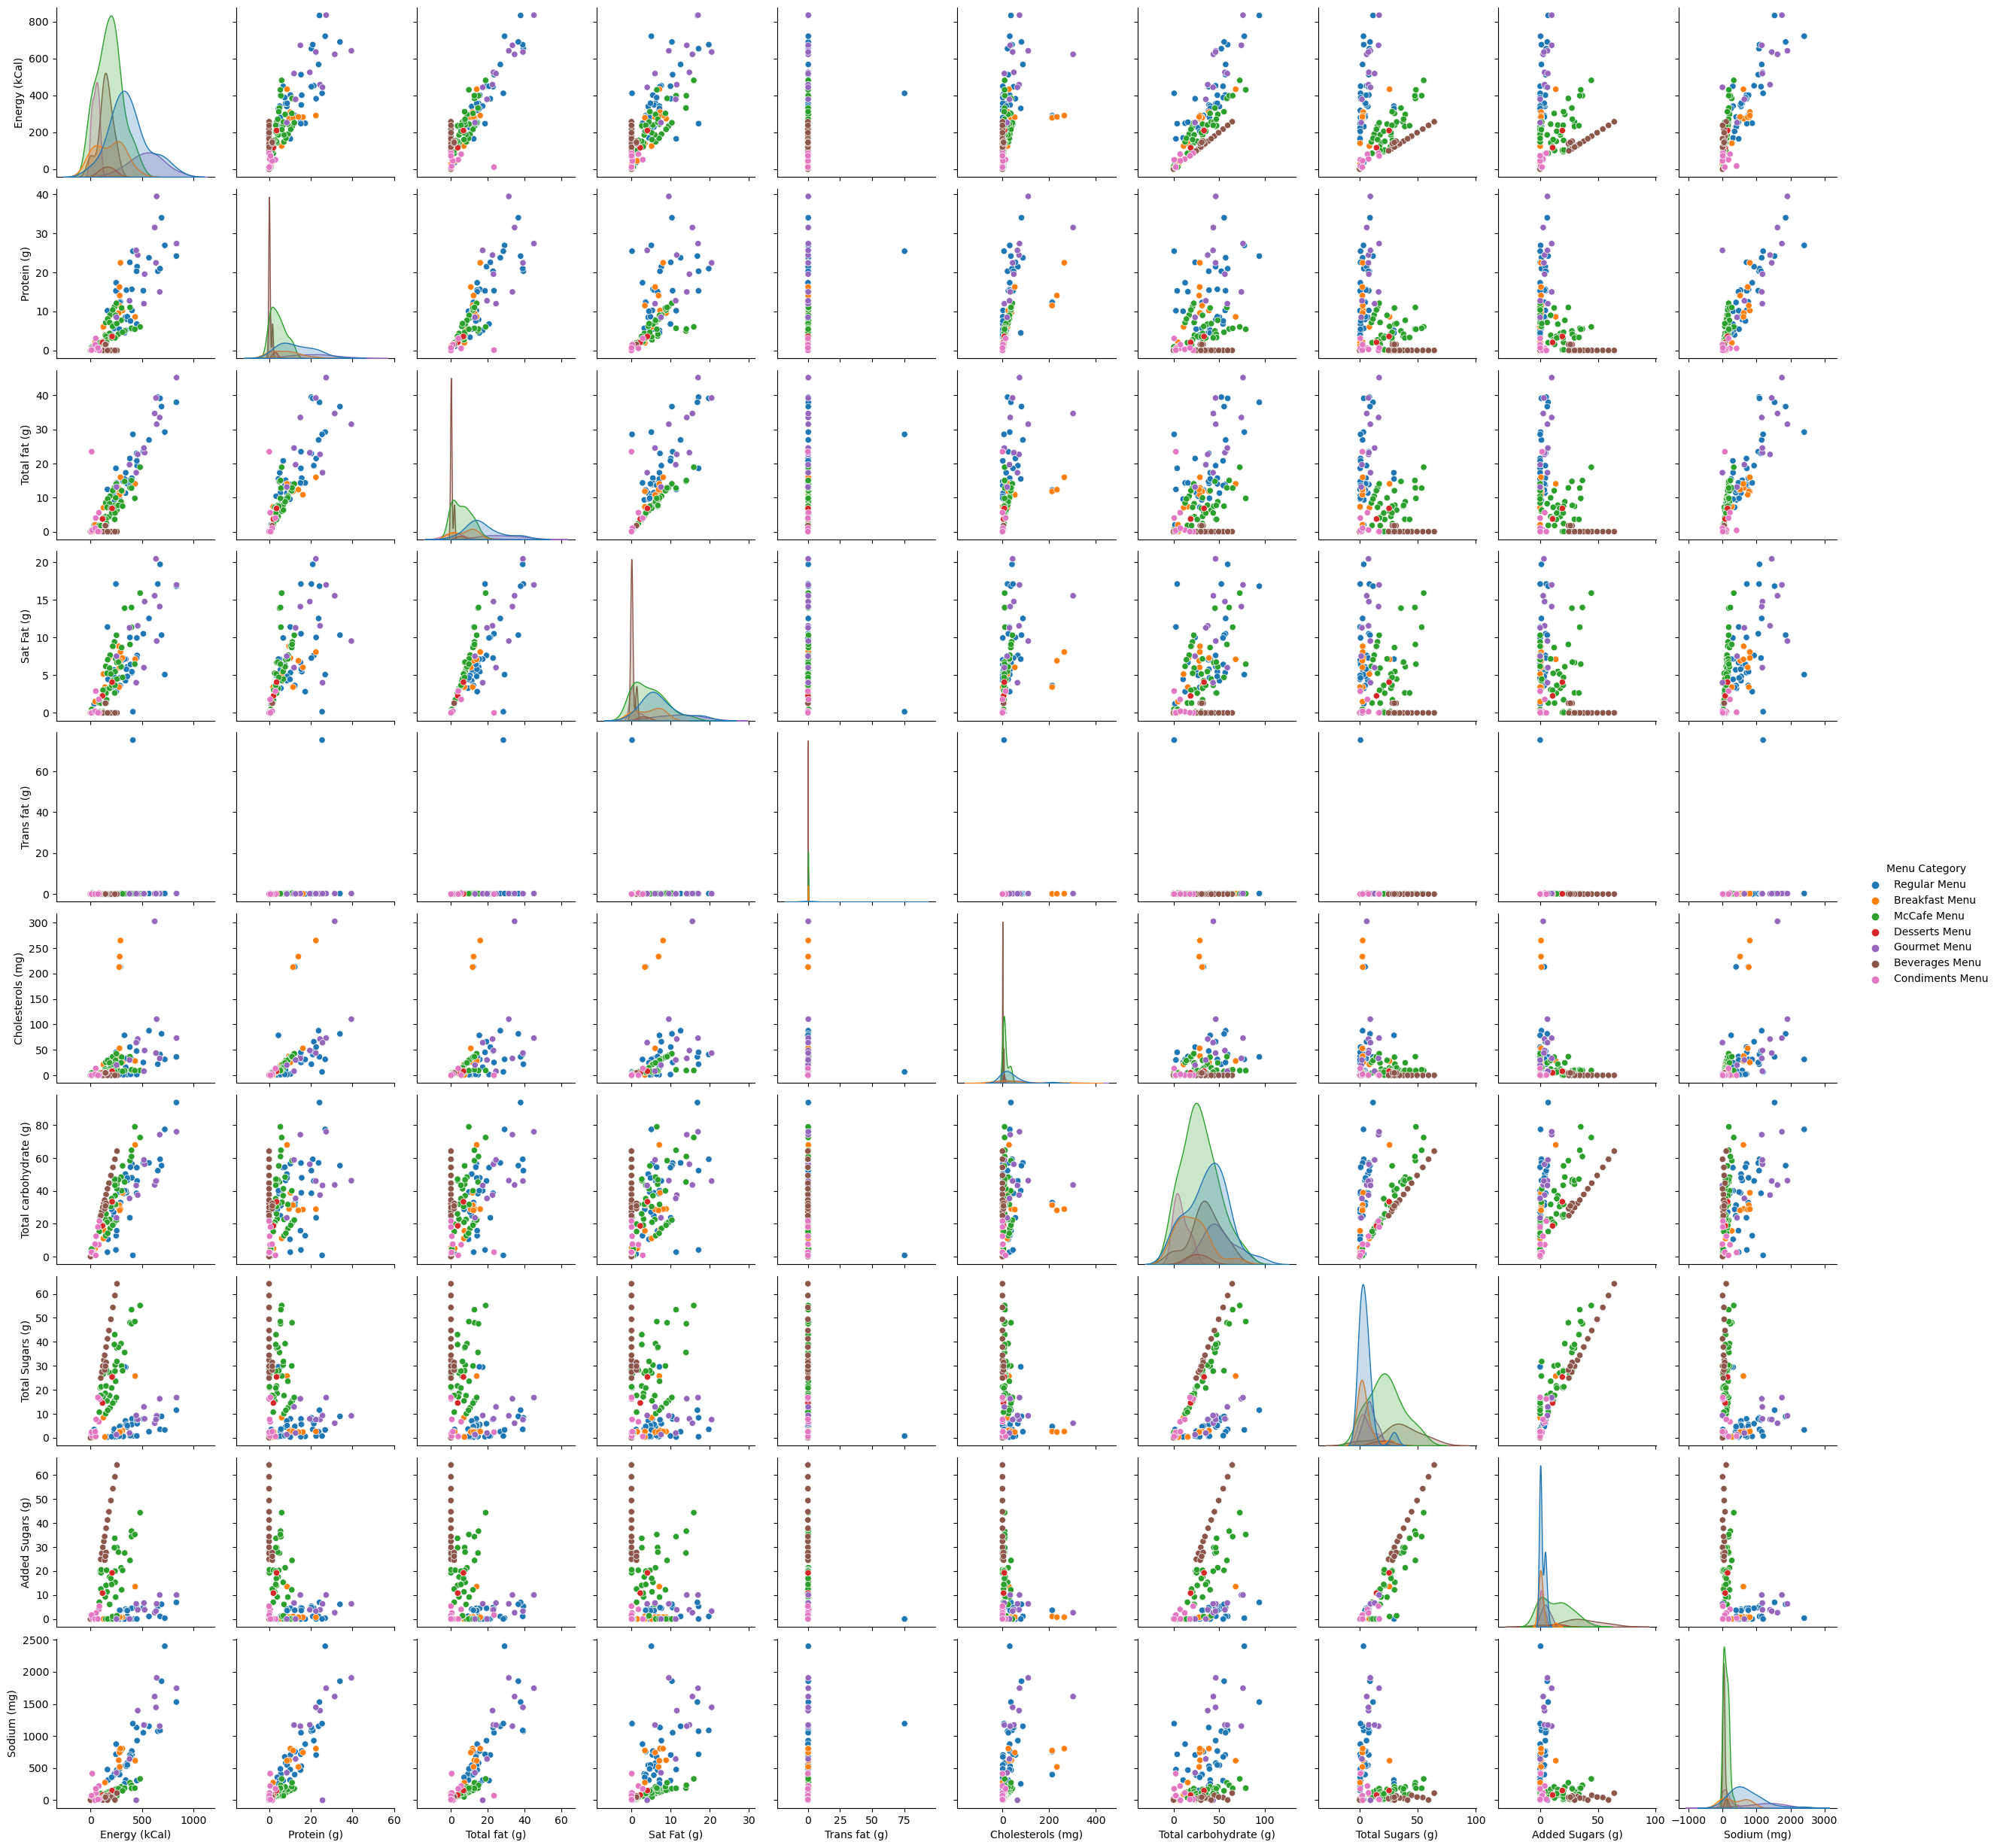

In [40]:
#pairplot
sns.pairplot(df,hue='Menu Category')


In [41]:
#Checking if any dish has sodium content greater than or equal to 2300mg
#it is said that high ammount of sodium intake may lead to high blood pressure
df[df['Sodium (mg)']>=2300][['Menu Category', 'Menu Items', 'Per Serve Size',
       'Protein (g)', 
       'Cholesterols (mg)', 'Total Sugars (g)', 'Sodium (mg)']]

Menu Category                                  Menu Items Per Serve Size  \
18  Regular Menu  Ghee Rice with Mc Spicy Fried Chicken 1 pc          325 g   

    Protein (g)  Cholesterols (mg)  Total Sugars (g)  Sodium (mg)  
18        26.91              31.32              3.28      2399.49

In [42]:
#now checking in between 1725 to 2300
df[df['Sodium (mg)'].apply(lambda x: 1725 <= x < 2300)][['Menu Category', 'Menu Items', 'Per Serve Size',
       'Protein (g)', 'Total fat (g)',
       'Cholesterols (mg)',  'Total Sugars (g)', 'Sodium (mg)']]

Menu Category                               Menu Items Per Serve Size  \
12   Regular Menu                     Chicken Maharaja Mac          296 g   
107  Gourmet Menu               Chicken Cheese Lava Burger          307 g   
108  Gourmet Menu  Chunky Chipotle American Burger Chicken          301 g   

     Protein (g)  Total fat (g)  Cholesterols (mg)  Total Sugars (g)  \
12         34.00          36.69              81.49              8.92   
107        27.37          45.18              73.11             16.75   
108        39.47          31.51             110.37              9.16   

     Sodium (mg)  
12       1854.71  
107      1745.04  
108      1906.27

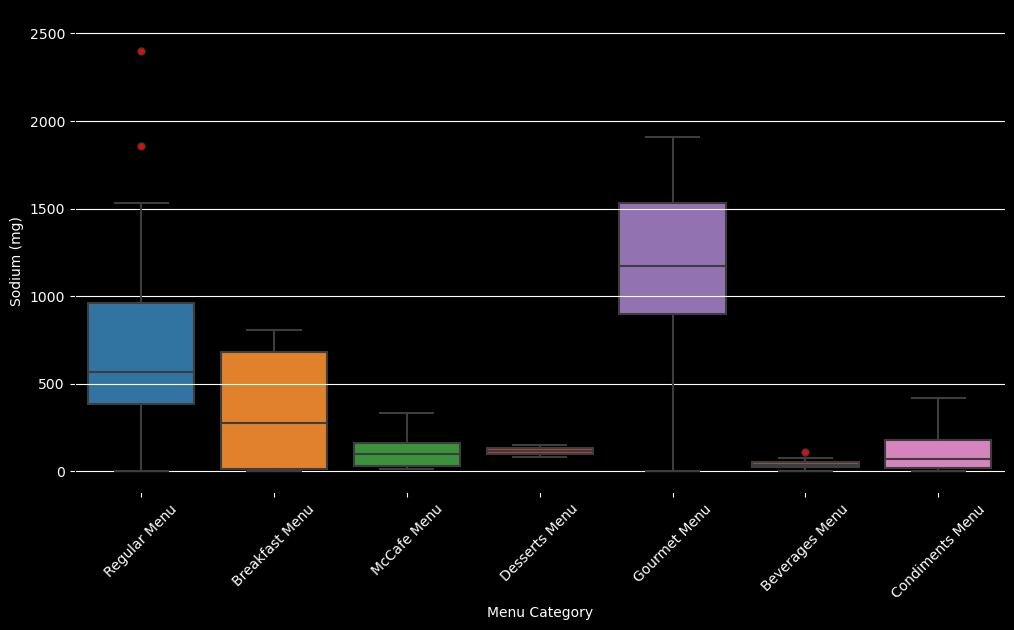

In [43]:
# Create the boxplot
plt.figure(figsize = (12, 6))

ax = sns.boxplot(x='Menu Category', y='Sodium (mg)',data=df,flierprops={'markerfacecolor': 'red', 'marker': 'o'})

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set title
plt.title('Total Sodium Mark')

# Set background color
fig = plt.gcf()
fig.set_facecolor('black')
ax.set_facecolor('black')

# Set tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set label colors
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set grid color
ax.yaxis.grid(color='white')

# Display the plot
plt.show()

In [45]:
fig=px.scatter(df,x='Total fat (g)',y='Total Sugars (g)',size='Cholesterols (mg)',
               color='Menu Category',hover_name='Menu Items',template='plotly_dark')
fig.update_layout(title_text='FAT-SUGAR-CHOLESTEROLS',template='plotly_dark')
fig.show()

In [46]:
#Observations
#1.McCafe and Beverages menu items have high total sugar content
#2.Regular,Breakfast and Gourmet menu items have low total sugar content
#3.Regular Menu items have high fat content
#3.Chocolate oreo Frapper(Breakast menu) has highest total sugar content of 55.14g
#4.Chicken cheese lava burger(Gourment menu) has highest total fat content of 45.18g
#5.McSpicy Premium Chicken Burger(Gourment menu) has the highest cholesterol content of 302.61mg

In [53]:
#plotting macro nutrients
fig=px.scatter(df,x='Protein (g)',y='Total carbohydrate (g)',size='Total fat (g)',
               color='Menu Category',hover_data='Energy (kCal)',hover_name='Menu Items',template='plotly_dark')
fig.update_layout(title_text='PROTEINS-CARBOHYDRATES-FAT',template='plotly_dark')
fig.show()

In [55]:
#Observation
#1.Condiments Menu items don't have significant distribution of nutrients with an average energy of almost 47 kcal
#2.Beverages Menu items don't contain high amount of nutrients with an average energy of almost 143 kcal which is roughly 3 times more than Condiment Menu
#3.McCafe Menu items aren't high on proteins but a few items contain fair amount of carbohydrates and fat and average energy of almost 184 kcal which is roughly 4 times more than that of condiments Menu
#4.Gourmet Menu items are rich of macro nutrients especially have high fat content due to which they have an average energy of 543 kcal
#5.McCafe Menu items are not rich with Proteins but fair amount of carbohydates(avg carbs of 29g) and average energy of 184 kcal
#6.Regular Menu items are rich with macro nutrients and energy with an average of 368 kcal
#Dishes
#1.Chicken cheese lava burger(Gourmet Menu) has the highest energy of 834.36 but also has highest fat content of 45.18
#2.Chunky chipotle American burger chicken(Gourment Menu) has the highest protein content of 39.47g
#3.Veg Maharaj Mac(Regular Menu) has the highest carbohydrates content of 93.84g

<Axes: title={'center': 'Distribution of Menu'}, ylabel='Menu Category'>

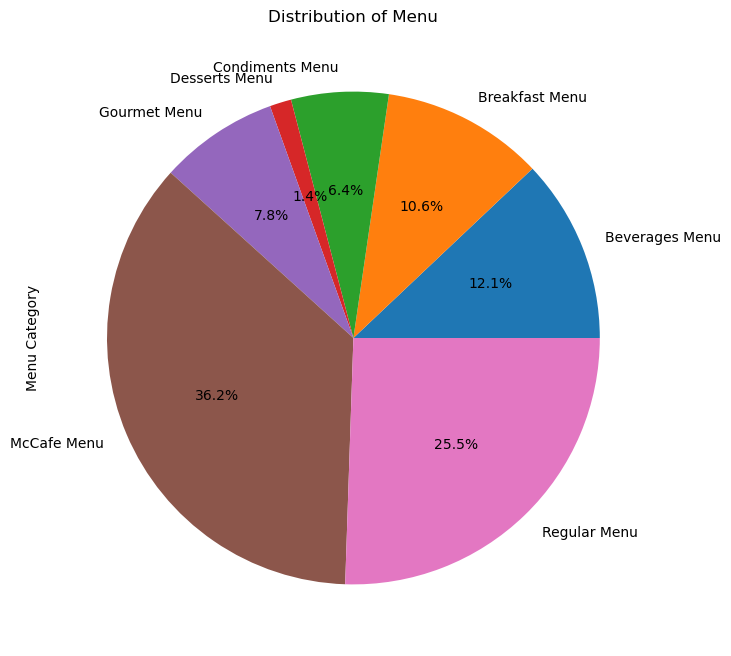

In [57]:
plt.title('Distribution of Menu')
df.groupby('Menu Category')['Menu Category'].count().plot.pie(figsize=(8,8),autopct="%1.1f%%")

In [69]:
categories = df['Menu Category'].value_counts()

plt.figure(figsize=(15,8))
fig=px.bar(categories,title='Number of items in categories',template='plotly_dark')
fig.update_traces(marker_color='#FFFF76')
fig.show()

<Figure size 1500x800 with 0 Axes>

In [ ]:
#Thankyou